# Teoría de Filtrado Moderna: Funciones de aproximación
<img src="./img/logo_UTN.svg" align="right" top width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 

En este notebook se analizará la respuesta en frecuencia de las funciones aproximantes:

* SciPy: [Butterworth](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttap.html#scipy.signal.buttap), [Chebyshev](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb1ap.html#scipy.signal.cheb1ap), [Bessel-Thompson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.besselap.html#scipy.signal.besselap)

Estas funciones fueron estudiadas en clase, y mediante la función de análisis [analyze_sys](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.analyze_sys) se puede apreciar la respuesta en frecuencia (módulo, fase y retardo) y el diagrama de polos y ceros.

También se agregan las aproximaciones de [Cauer o elíptica](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipap.html#scipy.signal.ellipap) y la [Chebyshev 2 o inversa](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb2ap.html#scipy.signal.cheb2ap), ya que están implementadas en el [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html#).

Para cada aproximación, se podrá comparar cada uno de sus parámetros:

* orden del polinomio
* atenuación en la banda de detenida
* *ripple* o distorsión de amplitud en la banda de paso

de forma didáctica. Para ello también se usan otras funciones de apoyo como 

* Análisis de la respuesta en frecuencia: [analyze_sys](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.analyze_sys), [bodePlot](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.bodePlot), [pzmap](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pzmap), [pretty_print_bicuad_omegayq](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pretty_print_bicuad_omegayq), [GroupDelay](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.GroupDelay)
* De presentación algebraica: [print_latex](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_latex), [a_equal_b_latex_s](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.a_equal_b_latex_s)


En el siguiente documento se presenta una comparativa de las funciones de aproximación estudiadas en Teoría de Filtrado Moderna, para la asignatura Teoría de Circuitos 2:

* Butterworth
* Chebyshev
* Bessel
* Cauer

El script permite parametrizar diferentes aspectos de la función de aproximación, como el ripple en la banda de paso, la atenuación en la banda de detenida y el orden. Como resultado se visualiza:

* Respuesta de módulo, fase y retardo de grupo
* Diagrama de polos y ceros

Se comienza con la importación de módulos externos

In [1]:
# Inicialización e importación de módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi

fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


In [2]:
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle


Se define la siguiente función para facilitar y sistematizar el análisis de cada transferencia. La utilizaremos más adelante.

In [3]:

def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_att)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        
        all_sys.append(sig.TransferFunction(num,den))

        this_label = this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att)
        
        print_subtitle(this_label)
        # factorizamos en SOS's
        this_sos = tf2sos_analog(num, den)
        
        pretty_print_SOS(this_sos, mode='omegayq')
        
        filter_names.append(this_label)
        
    # el caracter "_" descarta la salida de la función
    _ = analyze_sys( all_sys, filter_names )

    return( all_sys, filter_names )
    

## Comparativa de órdenes


Este pequeño ejemplo permite comparar diferentes órdenes de la función de aproximación Butterworth. Quien lea este documento y se interese, puede probar todas las funciones aproximantes, órdenes, *ripple* y atenuaciones de la banda de detenida.


#### Aproximaciones de Butterworth

#### Butterworth_ord_2_rip_3_att_40

<IPython.core.display.Math object>

#### Butterworth_ord_3_rip_3_att_40

<IPython.core.display.Math object>

#### Butterworth_ord_4_rip_3_att_40

<IPython.core.display.Math object>

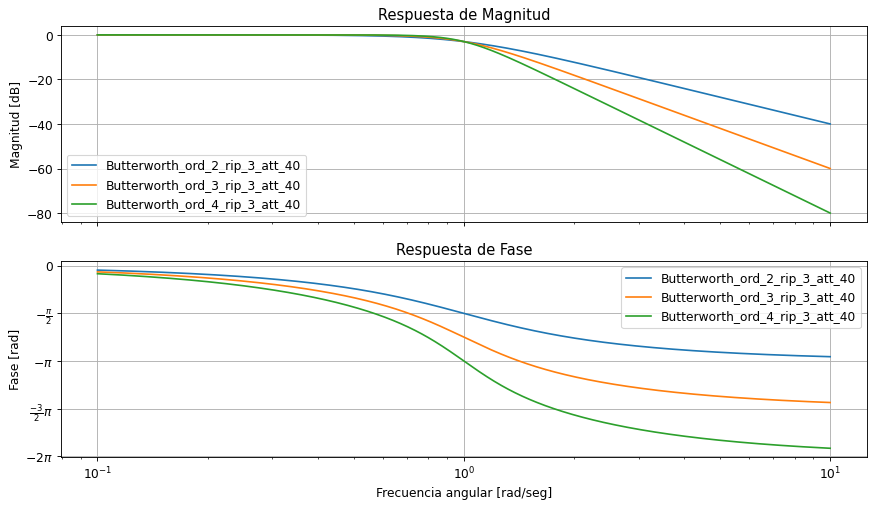

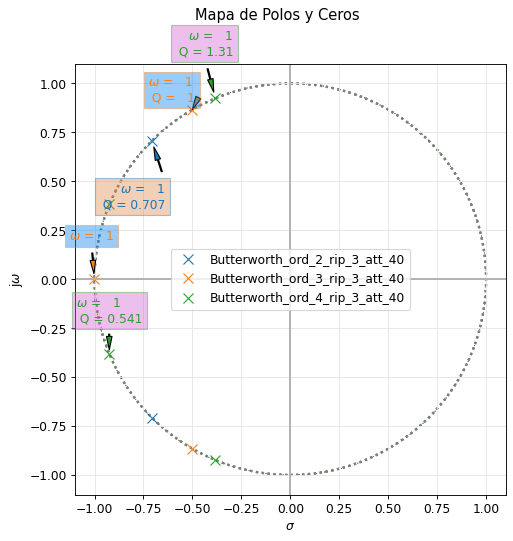

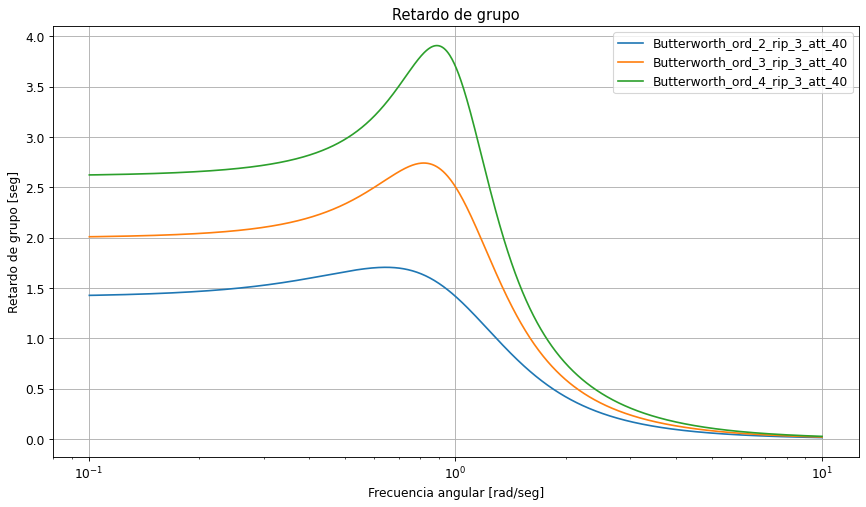

In [4]:
        
aprox_name = 'Butterworth'
#aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [2, 3, 4]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [3] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximaciones de Butterworth')

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


Si se quiere analizar alguna parte en particular, como la banda de paso, podemos aprovechar las figuras generadas por *analyze_sys* y modificar los ejes de representación.

Text(0.5, 1.0, 'Detalle de la banda de paso')

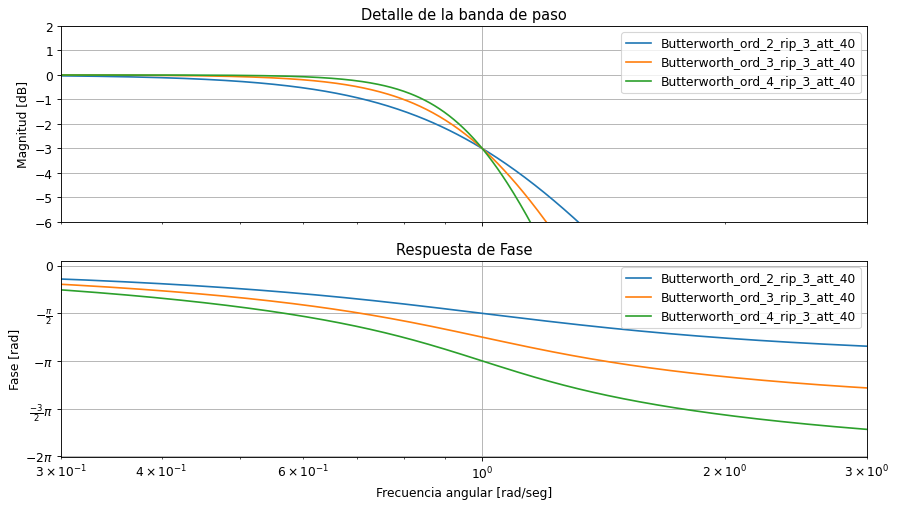

In [5]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-2*max_ripple, 2.]) )
plt.xlim(np.array([3. * 10.**-1, 3. * 10.**-0]) )
plt.title('Detalle de la banda de paso')


#### Aproximaciones de Máxima Planicidad

#### Butterworth_ord_4_rip_0.5_att_40

<IPython.core.display.Math object>

#### Butterworth_ord_4_rip_1_att_40

<IPython.core.display.Math object>

#### Butterworth_ord_4_rip_3_att_40

<IPython.core.display.Math object>

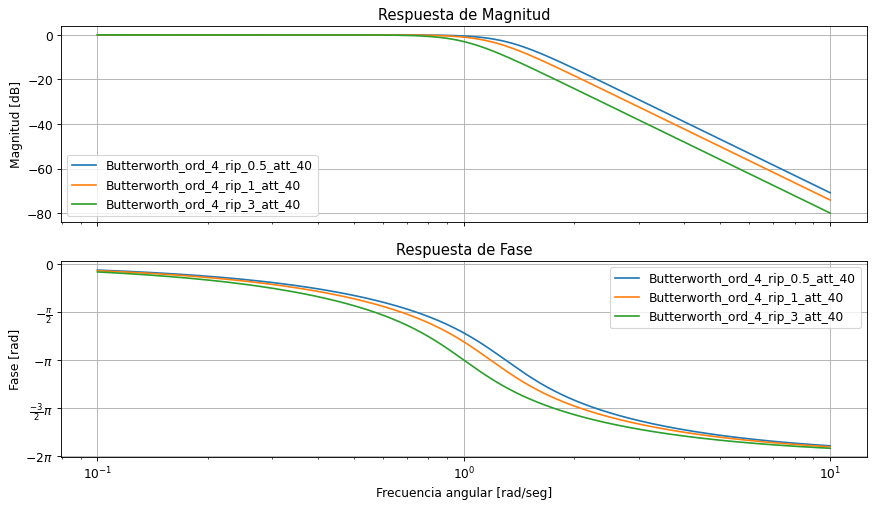

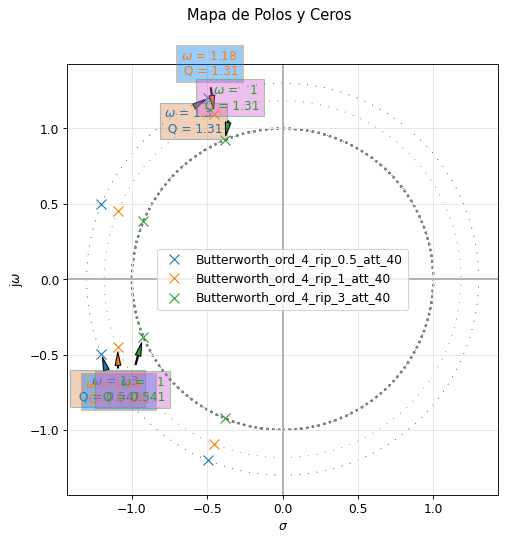

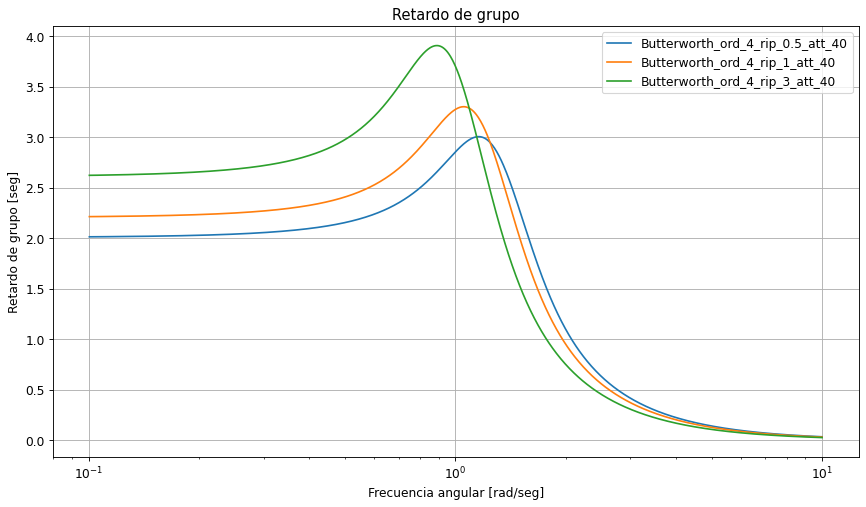

In [6]:
        
aprox_name = 'Butterworth'
#aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el ripple
ripple = [0.5, 1, 3]  # dB \alpha_{max} 

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
orders2analyze = [4] * len(orders2analyze)
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximaciones de Máxima Planicidad')

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


Text(0.5, 1.0, 'Detalle de la banda de paso')

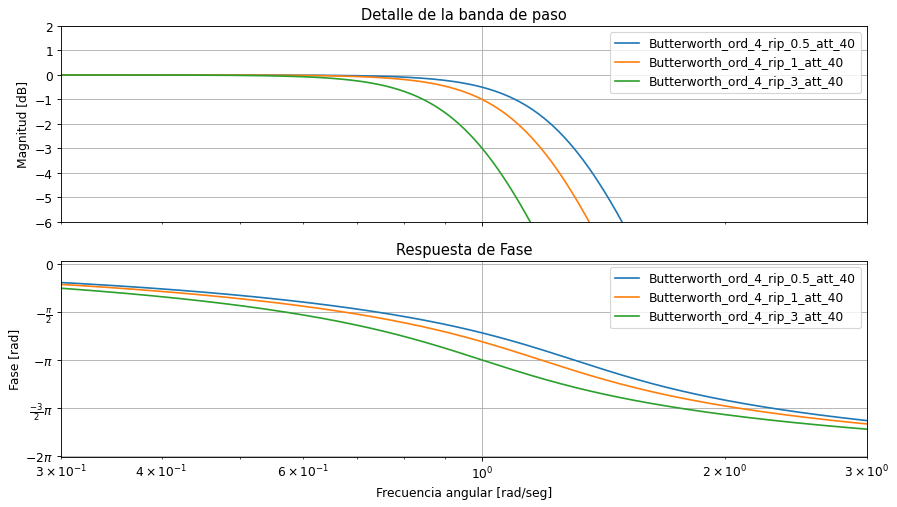

In [7]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-2*max_ripple, 2.]) )
plt.xlim(np.array([3. * 10.**-1, 3. * 10.**-0]) )
plt.title('Detalle de la banda de paso')


#### Aproximaciones de Chebyshev

#### Chebyshev1_ord_2_rip_3_att_40

<IPython.core.display.Math object>

#### Chebyshev1_ord_3_rip_3_att_40

<IPython.core.display.Math object>

#### Chebyshev1_ord_4_rip_3_att_40

<IPython.core.display.Math object>

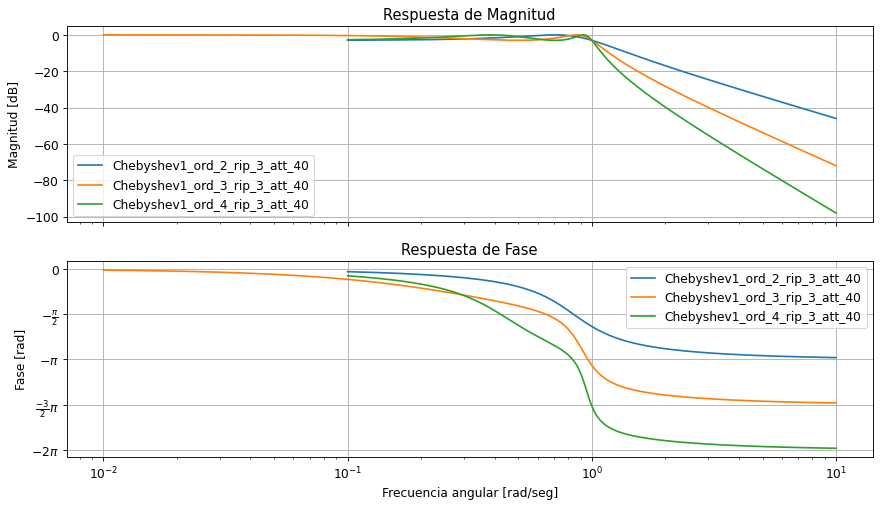

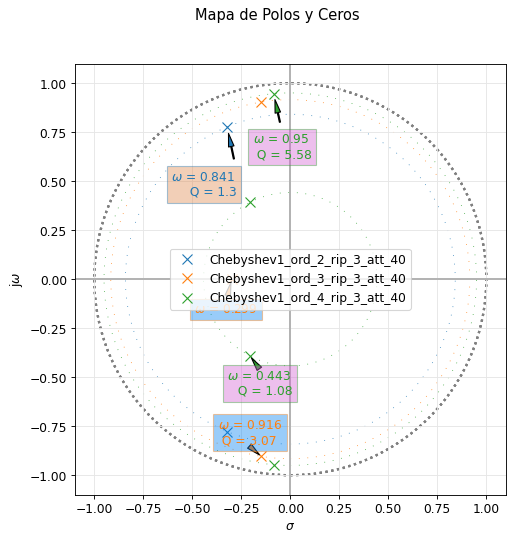

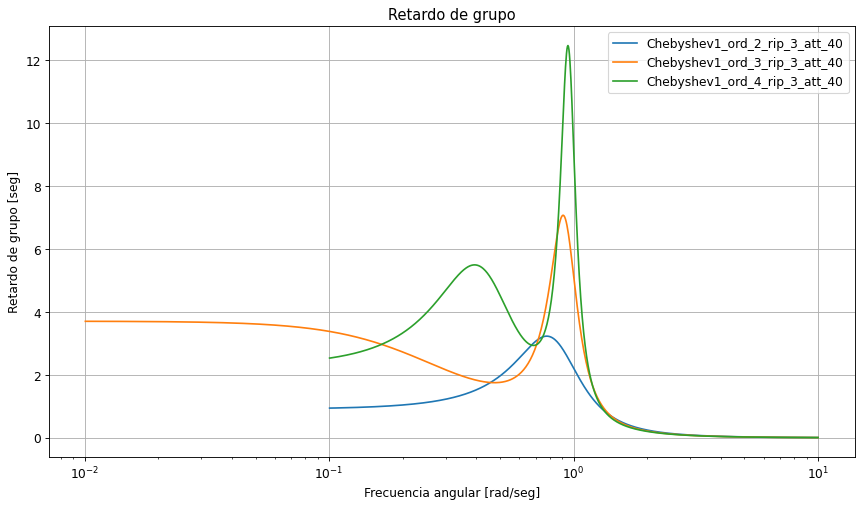

In [26]:
        
#aprox_name = 'Butterworth'
aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [2, 3, 4]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [3] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximaciones de Chebyshev')

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


Text(0.5, 1.0, 'Detalle de la banda de paso')

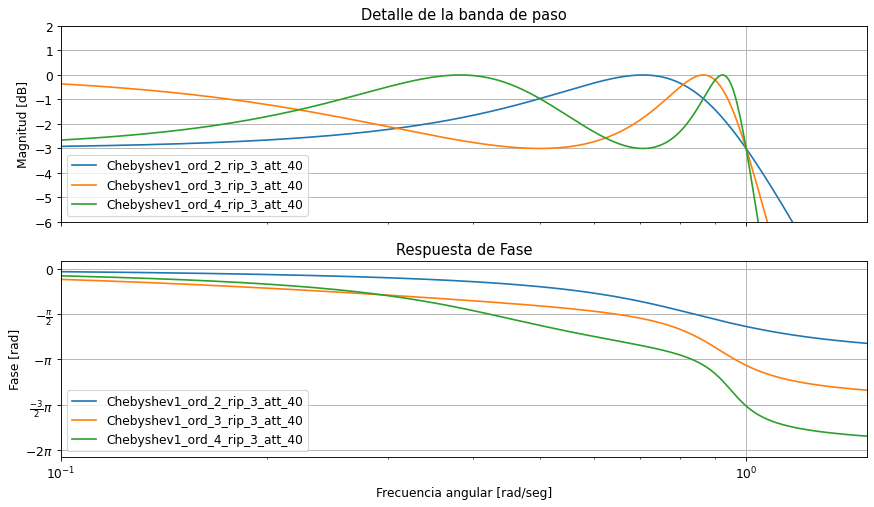

In [27]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-2*max_ripple, 2.]) )
plt.xlim(np.array([1. * 10.**-1, 1.5 * 10.**-0]) )
plt.title('Detalle de la banda de paso')


#### Aproximaciones de Chebyshev

#### Chebyshev1_ord_4_rip_0.5_att_40

<IPython.core.display.Math object>

#### Chebyshev1_ord_4_rip_1_att_40

<IPython.core.display.Math object>

#### Chebyshev1_ord_4_rip_3_att_40

<IPython.core.display.Math object>

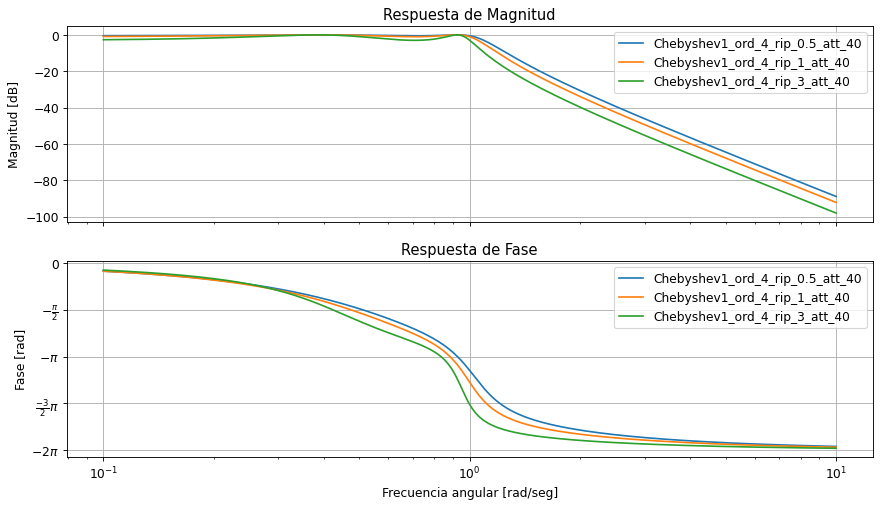

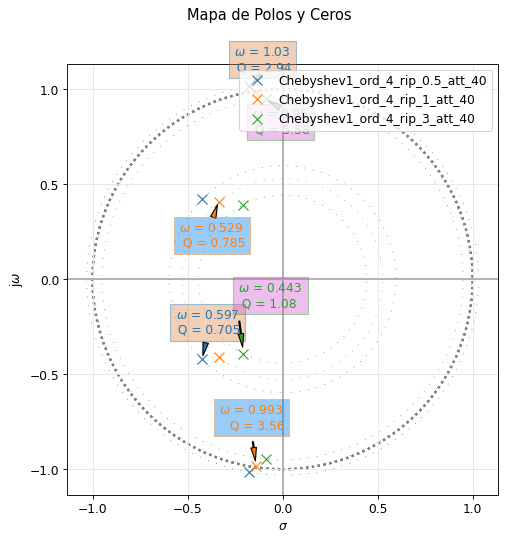

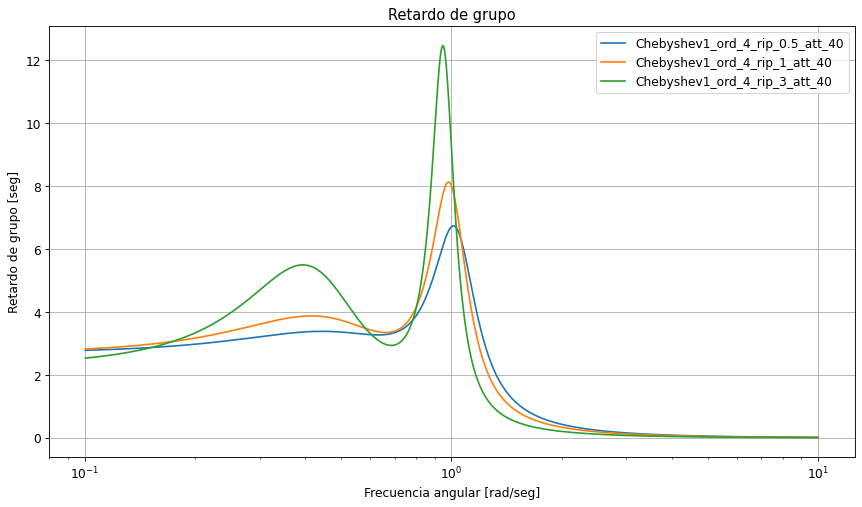

In [28]:
        
#aprox_name = 'Butterworth'
aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el ripple
ripple = [0.5, 1, 3]  # dB \alpha_{max} 

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
orders2analyze = [4] * len(orders2analyze)
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximaciones de Chebyshev')

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


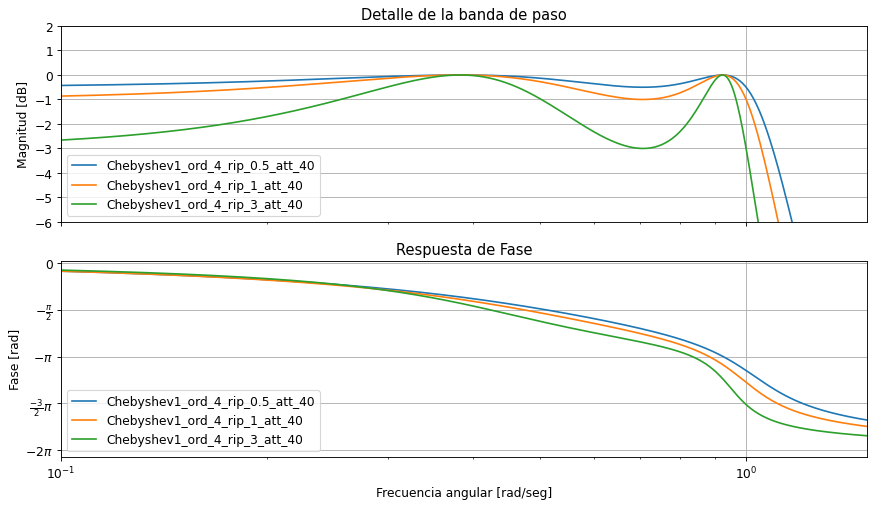

In [29]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-2*max_ripple, 2.]) )
plt.xlim(np.array([1 * 10.**-1, 1.5 * 10.**-0]) )
_ = plt.title('Detalle de la banda de paso')


#### Aproximaciones de Bessel-Thompson

#### Bessel_ord_2_rip_3_att_40

<IPython.core.display.Math object>

#### Bessel_ord_3_rip_3_att_40

<IPython.core.display.Math object>

#### Bessel_ord_4_rip_3_att_40

<IPython.core.display.Math object>

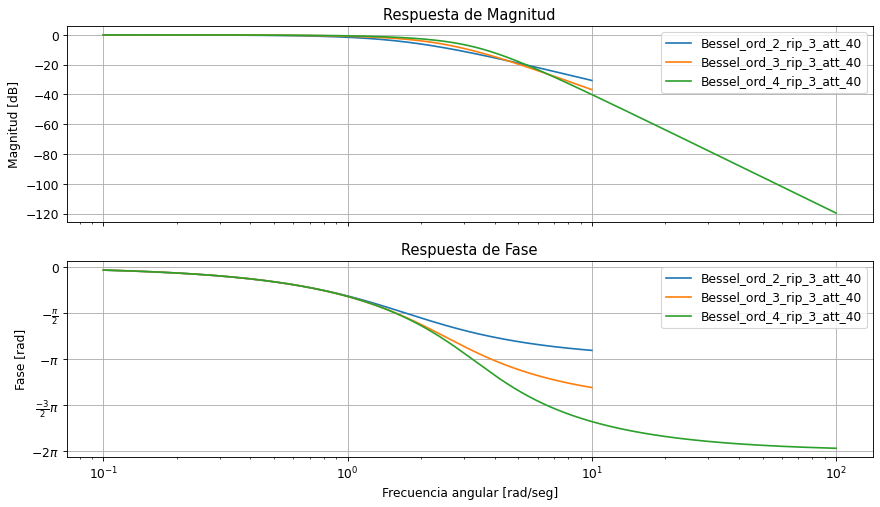

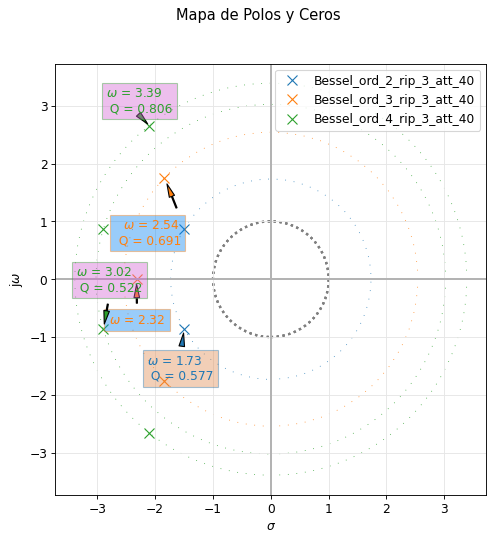

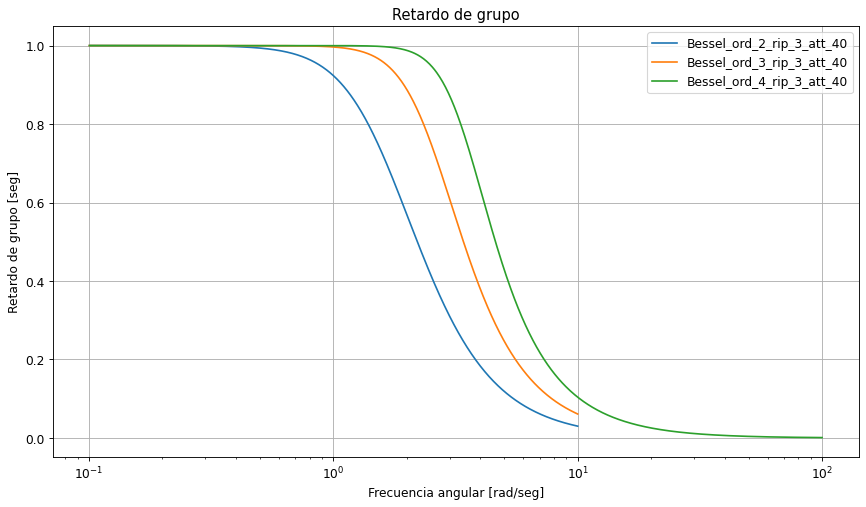

In [12]:
        
#aprox_name = 'Butterworth'
#aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [2, 3, 4]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [3] * len(orders2analyze) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(orders2analyze) # dB \alpha_{min} <-- Sin parametrizar, att fija


print_subtitle('Aproximaciones de Bessel-Thompson')

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


En este caso podría ser más interesante visualizar el detalle de la banda de transición.

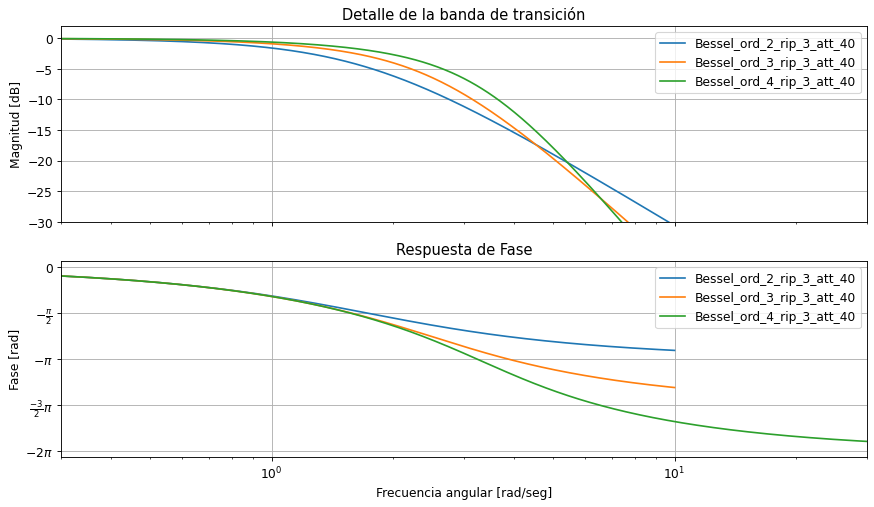

In [13]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-30, 2.]) )
plt.xlim(np.array([3. * 10.**-1, 3. * 10.**1]) )
_ = plt.title('Detalle de la banda de transición')


## Comparativa de funciones de aproximación


Con este otro ejemplo se comparan las funciones de aproximación, para los mismos parámetros o requerimientos de plantilla.


#### Butterworth_ord_5_rip_3_att_40

<IPython.core.display.Math object>

#### Chebyshev1_ord_5_rip_3_att_40

<IPython.core.display.Math object>

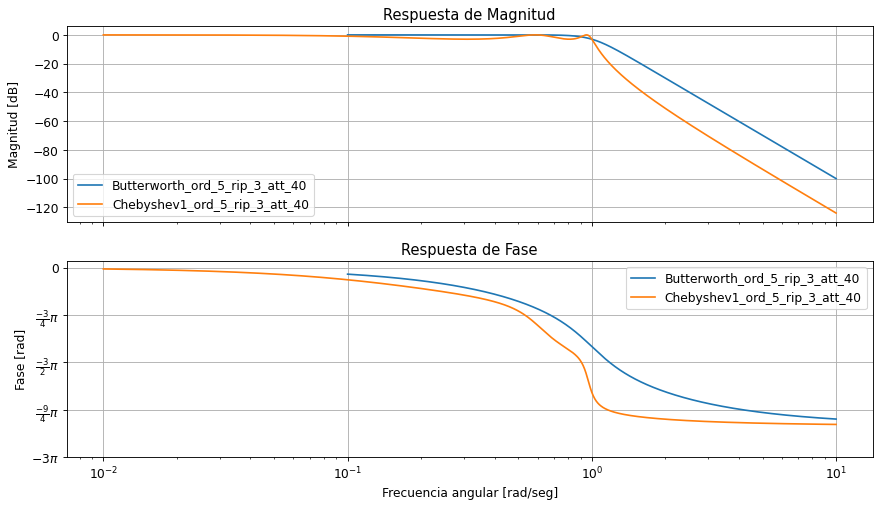

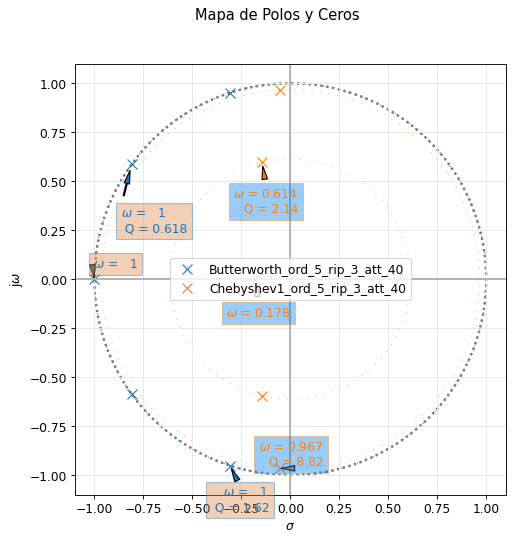

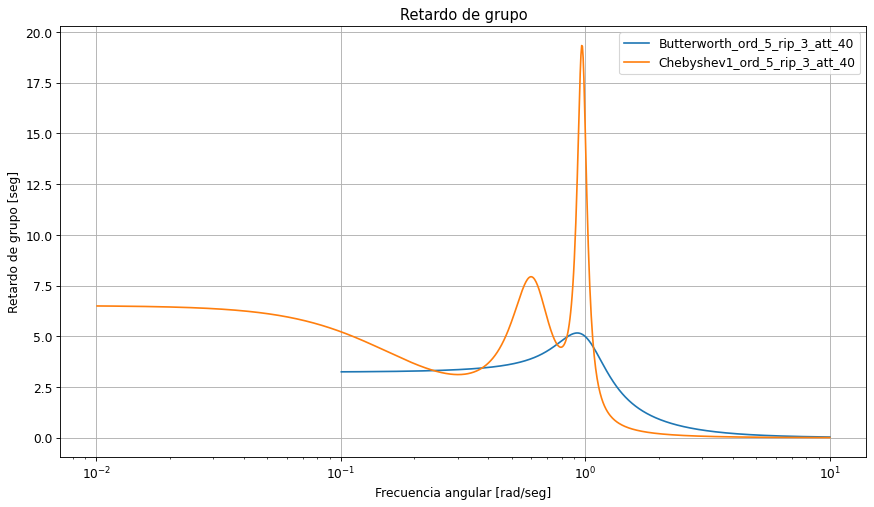

In [14]:

# comparamos las aproximaciones disponibles en scipy
aproxs = ['Butterworth','Chebyshev1']
#aproxs = ['Chebyshev1','Chebyshev2']
#aproxs = ['Butterworth', 'Chebyshev1', 'Cauer']
#aproxs = ['Butterworth', 'Chebyshev1', 'Bessel']


# Mismo requerimiento de orden, ripple y atenuación
orders2analyze = [5] * len(aproxs)
ripple = [3] * len(aproxs) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(aproxs) # dB \alpha_{min} <-- Sin parametrizar, att fija

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


#### Chebyshev1_ord_5_rip_3_att_40

<IPython.core.display.Math object>

#### Chebyshev2_ord_5_rip_3_att_40

<IPython.core.display.Math object>

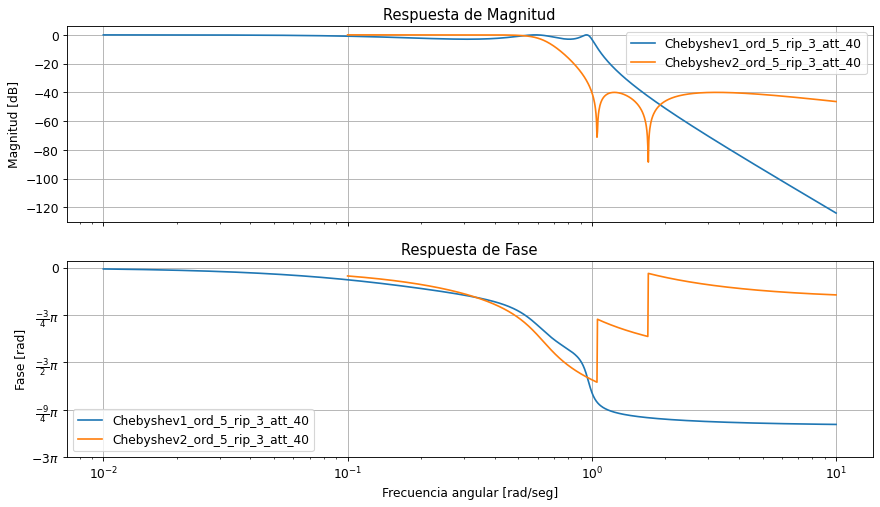

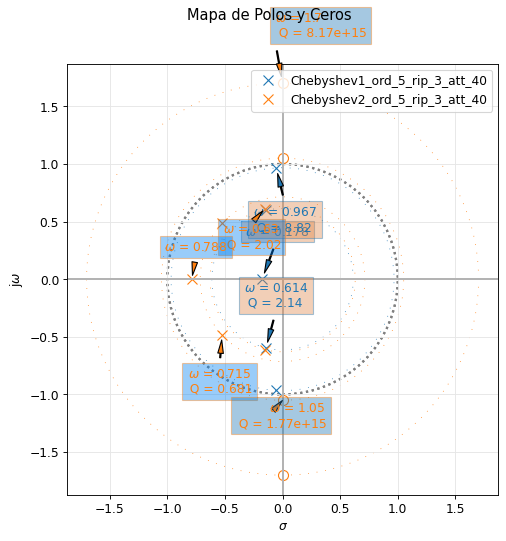

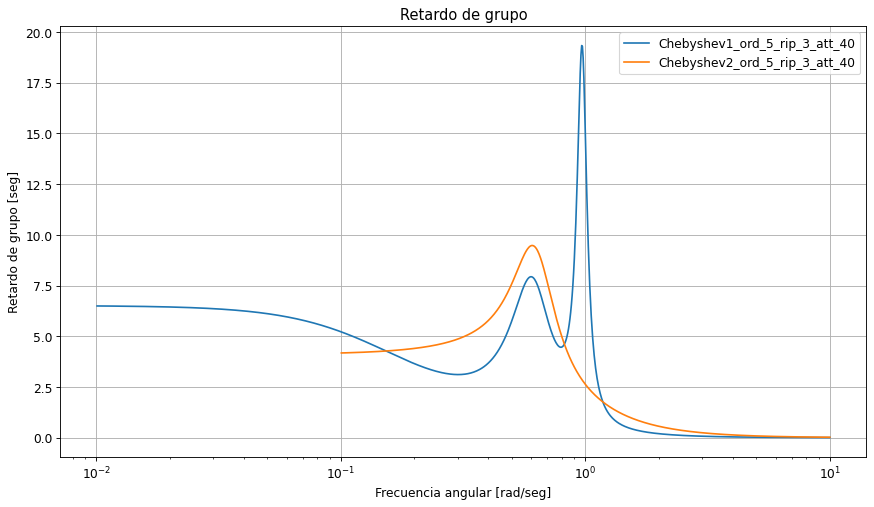

In [15]:

# comparamos las aproximaciones disponibles en scipy
#aproxs = ['Butterworth','Chebyshev1']
aproxs = ['Chebyshev1','Chebyshev2']
#aproxs = ['Butterworth', 'Chebyshev1', 'Cauer']
#aproxs = ['Butterworth', 'Chebyshev1', 'Bessel']


# Mismo requerimiento de orden, ripple y atenuación
orders2analyze = [5] * len(aproxs)
ripple = [3] * len(aproxs) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(aproxs) # dB \alpha_{min} <-- Sin parametrizar, att fija

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


#### Butterworth_ord_5_rip_3_att_40

<IPython.core.display.Math object>

#### Cauer_ord_5_rip_3_att_40

<IPython.core.display.Math object>

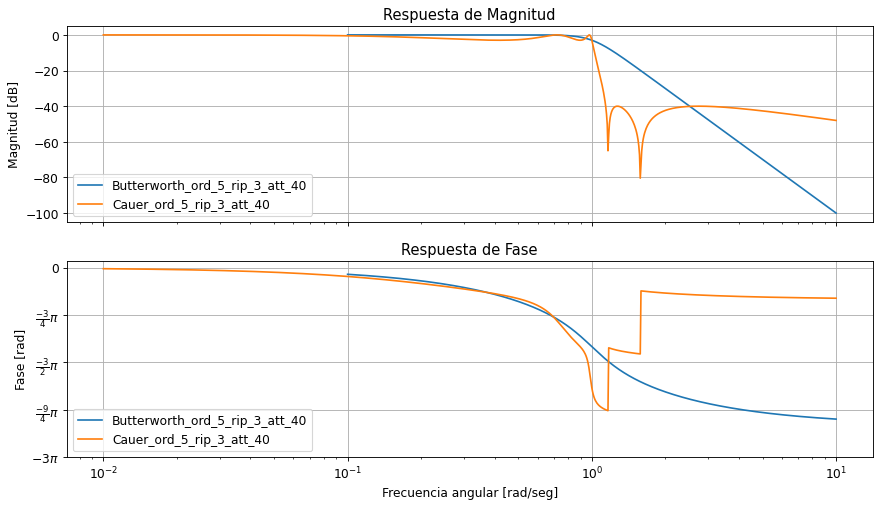

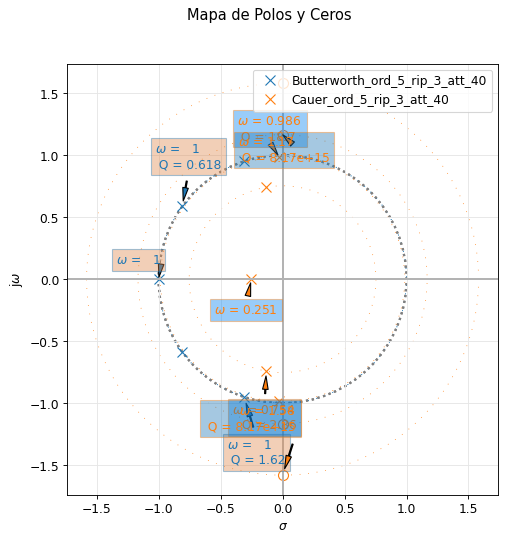

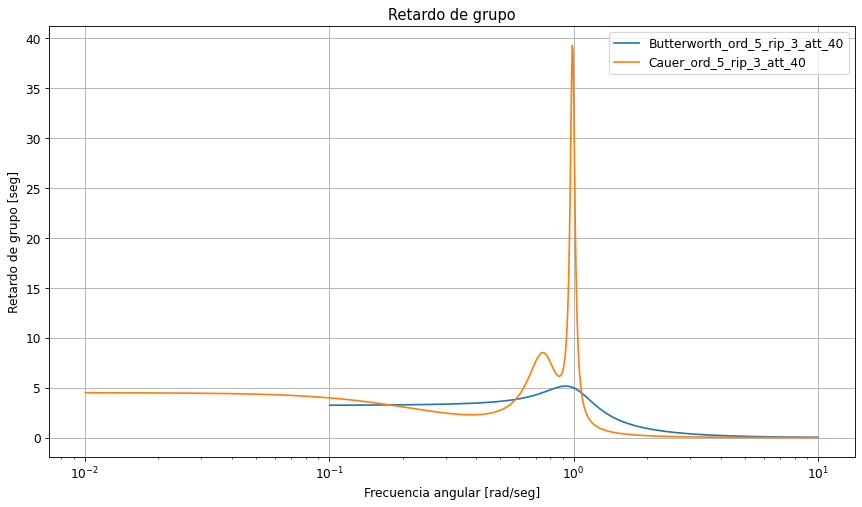

In [16]:

# comparamos las aproximaciones disponibles en scipy
#aproxs = ['Butterworth','Chebyshev1']
#aproxs = ['Chebyshev1','Chebyshev2']
aproxs = ['Butterworth', 'Cauer']
#aproxs = ['Butterworth', 'Chebyshev1', 'Bessel']


# Mismo requerimiento de orden, ripple y atenuación
orders2analyze = [5] * len(aproxs)
ripple = [3] * len(aproxs) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en ButterworthO
attenuation = [40] * len(aproxs) # dB \alpha_{min} <-- Sin parametrizar, att fijaO

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)


Se visualizan las características interesantes de la transferencia de Cauer, como es la transferencia equi-ripple tanto en banda de paso como de atenuación

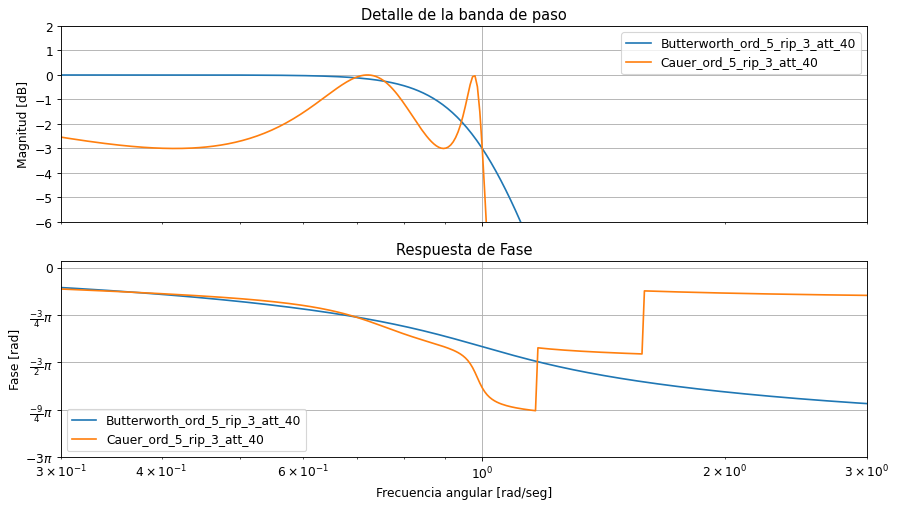

In [17]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-2*max_ripple, 2.]) )
plt.xlim(np.array([3. * 10.**-1, 3. * 10.**0]) )
_ = plt.title('Detalle de la banda de paso')


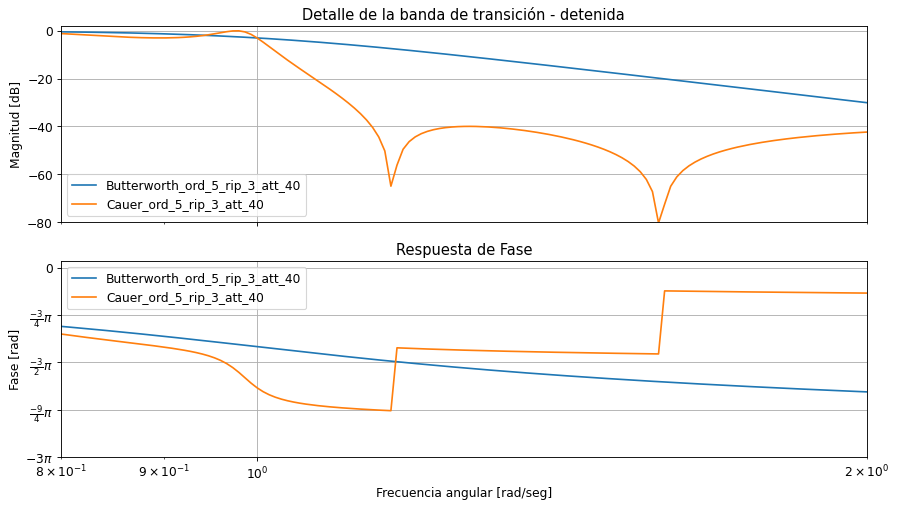

In [18]:
# el caracter "_" descarta la salida de la función
asy_axes = analyze_sys( all_sys, filter_names )

# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(ripple))
plt.ylim(np.array([-80, 2.]) )
plt.xlim(np.array([8. * 10.**-1, 2. * 10.**0]) )
_ = plt.title('Detalle de la banda de transición - detenida')


#### Butterworth_ord_5_rip_3_att_40

<IPython.core.display.Math object>

#### Bessel_ord_5_rip_3_att_40

<IPython.core.display.Math object>

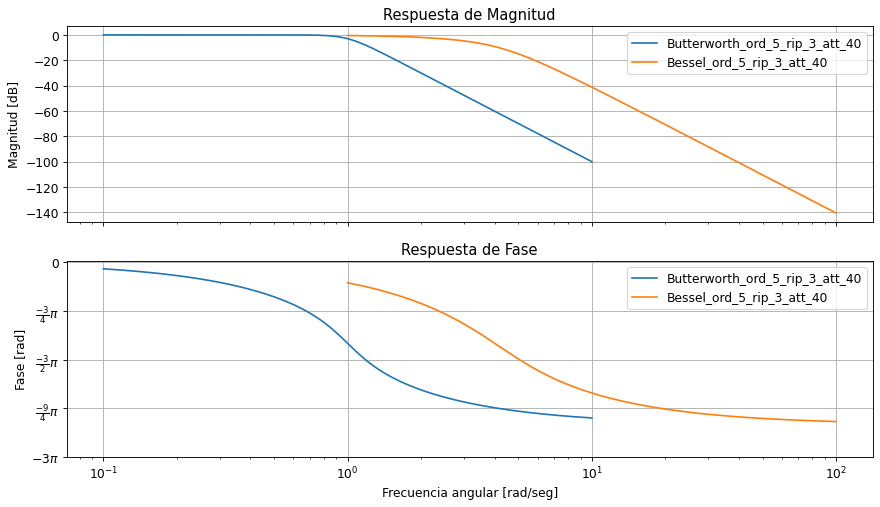

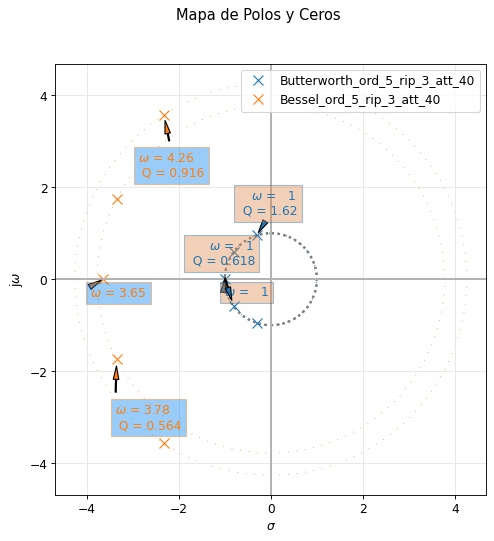

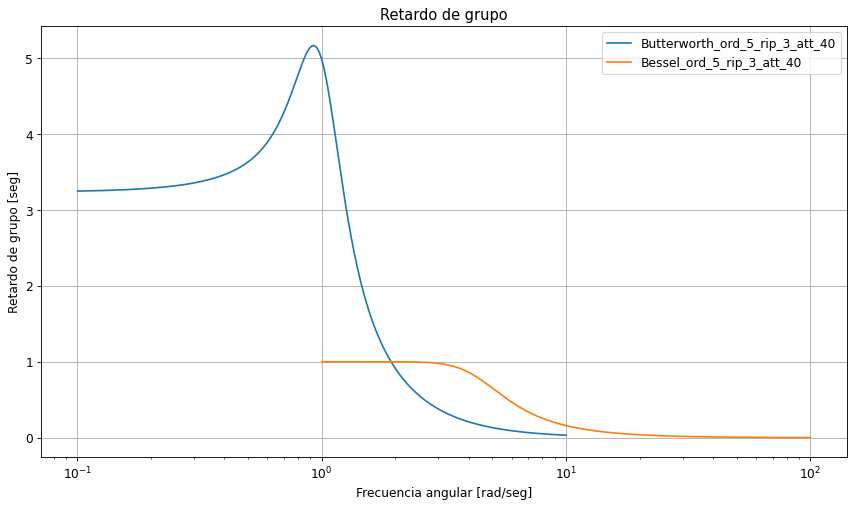

In [19]:

# comparamos las aproximaciones disponibles en scipy
#aproxs = ['Butterworth','Chebyshev1']
#aproxs = ['Chebyshev1','Chebyshev2']
#aproxs = ['Butterworth', 'Chebyshev1', 'Cauer']
aproxs = ['Butterworth', 'Bessel']


# Mismo requerimiento de orden, ripple y atenuación
orders2analyze = [5] * len(aproxs)
ripple = [3] * len(aproxs) # dB \alpha_{max} <-- Sin parametrizar, lo dejo en Butterworth
attenuation = [40] * len(aproxs) # dB \alpha_{min} <-- Sin parametrizar, att fija

( all_sys, filter_names ) = sim_aprox(aproxs, orders2analyze, ripple, attenuation)
